In [8]:
!pip install pandas-gbq --quiet

In [29]:
from google.colab import auth
auth.authenticate_user()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_gbq import read_gbq



In [30]:
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12, 6)


In [32]:
PROJECT_ID = "curso-ebac-472318"


In [56]:
query_check = """
SELECT
  MIN(starttime) AS primeira_data,
  MAX(starttime) AS ultima_data,
  COUNT(*) AS total_registros
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
"""
df_check = read_gbq(query_check, project_id=PROJECT_ID, dialect='standard')
print(df_check)

Downloading: 100%|██████████|
  primeira_data             ultima_data  total_registros
0    2013-07-01 2018-05-31 23:59:59.606         58937715


In [60]:
query = """
SELECT
  tripduration,
  starttime,
  stoptime,
  start_station_id,
  start_station_name,
  end_station_id,
  end_station_name,
  start_station_latitude,
  start_station_longitude,
  end_station_latitude,
  end_station_longitude,
  usertype,
  birth_year
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE starttime >= '2017-01-01' AND starttime < '2017-07-01'
"""
df = read_gbq(query, project_id='curso-ebac-472318', dialect='standard')
print(df.shape)
df.head()


Downloading:   0%|          |
Downloading:   1%|          |
Downloading:   1%|          |
Downloading:   2%|▏         |
Downloading:   2%|▏         |
Downloading:   3%|▎         |
Downloading:   4%|▎         |
Downloading:   4%|▍         |
Downloading:   5%|▍         |
Downloading:   5%|▌         |
Downloading:   6%|▌         |
Downloading:   6%|▋         |
Downloading:   7%|▋         |
Downloading:   8%|▊         |
Downloading:   8%|▊         |
Downloading:   9%|▉         |
Downloading:   9%|▉         |
Downloading:  10%|█         |
Downloading:  11%|█         |
Downloading:  11%|█         |
Downloading:  12%|█▏        |
Downloading:  12%|█▏        |
Downloading:  13%|█▎        |
Downloading:  14%|█▎        |
Downloading:  14%|█▍        |
Downloading:  15%|█▍        |
Downloading:  15%|█▌        |
Downloading:  16%|█▌        |
Downloading:  16%|█▋        |
Downloading:  17%|█▋        |
Downloading:  18%|█▊        |
Downloading:  18%|█▊        |
Downloading:  19%|█▉        |
Downloadi

,tripduration,starttime,stoptime,start_station_id,start_station_name,end_station_id,end_station_name,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,usertype,birth_year
0,786,2017-06-26 06:29:15,2017-06-26 06:42:21,3236,W 42 St & Dyer Ave,520,W 52 St & 5 Ave,40.758985,-73.993800,40.759923,-73.976485,Subscriber,1987
1,665,2017-05-27 20:18:57,2017-05-27 20:30:02,3143,5 Ave & E 78 St,520,W 52 St & 5 Ave,40.776321,-73.964274,40.759923,-73.976485,Customer,<NA>
2,1445,2017-06-14 19:01:17,2017-06-14 19:25:23,3143,5 Ave & E 78 St,520,W 52 St & 5 Ave,40.776321,-73.964274,40.759923,-73.976485,Customer,<NA>
3,2133,2017-05-06 16:45:12,2017-05-06 17:20:45,3305,E 91 St & 2 Ave,520,W 52 St & 5 Ave,40.781122,-73.949656,40.759923,-73.976485,Subscriber,1987
4,4797,2017-06-19 07:49:42,2017-06-19 09:09:39,173,Broadway & W 49 St,520,W 52 St & 5 Ave,40.760683,-73.984527,40.759923,-73.976485,Customer,<NA>


In [61]:
# Datas
df["starttime"] = pd.to_datetime(df["starttime"], errors="coerce")
df["stoptime"] = pd.to_datetime(df["stoptime"], errors="coerce")


In [62]:
# Duração em minutos (tripduration é em segundos)
df["trip_min"] = df["tripduration"] / 60.0


In [63]:
# Remover outliers extremos e absurdos
df = df[(df["trip_min"] > 1) & (df["trip_min"] <= 180)]


In [64]:
# Campos temporais
df["year"] = df["starttime"].dt.year
df["month"] = df["starttime"].dt.month
df["dow"] = df["starttime"].dt.day_name()
df["hour"] = df["starttime"].dt.hour
df["month_trip"] = df["starttime"].dt.to_period("M")


In [65]:
# Idade
current_year = 2017
df["age"] = current_year - pd.to_numeric(df["birth_year"], errors="coerce")
df.loc[(df["age"] < 10) | (df["age"] > 100), "age"] = np.nan


In [66]:
# Faixas etárias
bins = [0, 24, 34, 44, 54, 64, 200]
labels = ["<=24", "25-34", "35-44", "45-54", "55-64", "65+"]
df["age_band"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)


In [67]:
# Checagens rápidas
print("Shape:", df.shape)
print(df[["starttime","trip_min","usertype"]].head())
print(df.isnull().sum())


Shape: (4559865, 21)
            starttime   trip_min    usertype
0 2017-06-26 06:29:15       13.1  Subscriber
1 2017-05-27 20:18:57  11.083333    Customer
2 2017-06-14 19:01:17  24.083333    Customer
3 2017-05-06 16:45:12      35.55  Subscriber
4 2017-06-19 07:49:42      79.95    Customer
tripduration                    0
starttime                       0
stoptime                        0
start_station_id                0
start_station_name              0
end_station_id                  0
end_station_name                0
start_station_latitude          0
start_station_longitude         0
end_station_latitude            0
end_station_longitude           0
usertype                        0
birth_year                 528730
trip_min                        0
year                            0
month                           0
dow                             0
hour                            0
month_trip                      0
age                        530002
age_band                   53

# Preguntas de negocio

1. Como variam as viagems por mes, dia da semana e hora?

2. Quais são as estações com mais partidas e chegadas?

3. Assinantes viagam de forma diferente de usuarios ocasionais?

4. Quais janelas horárias concemtram maior uso? Isso muda por dia util vs. fin de semana

     month    trips
0  2017-04  1312288
1  2017-05  1520083
2  2017-06  1727494


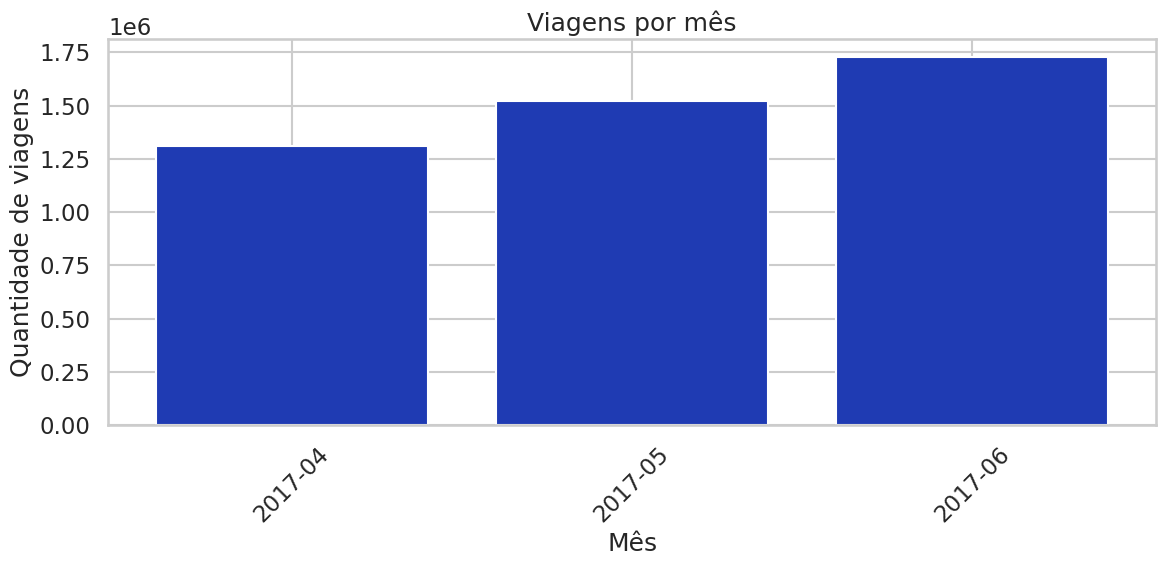

In [68]:
# 1. Volume por mês
monthly = df["month_trip"].value_counts().sort_index().reset_index()
monthly.columns = ["month", "trips"]
print(monthly.head())

plt.bar(monthly["month"].astype(str), monthly["trips"], color="#1f3bb3")
plt.title("Viagens por mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de viagens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

hour         0     1     2    3    4     5      6      7      8      9   ...  \
dow                                                                      ...   
Monday     3998  1840  1028  527  830  4398  16701  35468  59531  40517  ...   
Tuesday    3456  1602   742  469  854  4962  18997  38867  66224  47698  ...   
Wednesday  4273  2009  1029  537  860  5054  18483  38742  70716  50668  ...   
Thursday   5349  2308  1203  685  922  4828  17989  36844  62804  45322  ...   
Friday     6022  2797  1521  807  963  4328  15693  32918  60891  47286  ...   

hour          14     15     16     17     18     19     20     21     22  \
dow                                                                        
Monday     30814  32696  41731  66871  67738  46618  30266  19582  13482   
Tuesday    31418  33901  43285  75299  76013  50229  32185  22119  15329   
Wednesday  34582  37281  47970  81751  82471  56101  37032  24839  18267   
Thursday   33096  35674  44846  73357  74063  49426  33163 

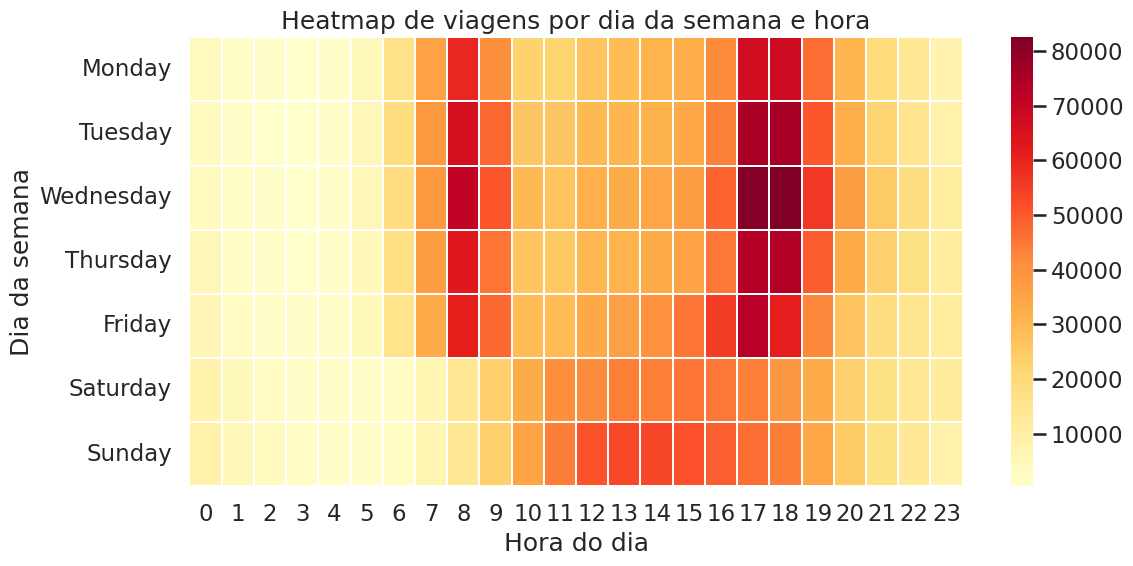

In [69]:
# Padrão por dia da semana e hora
dow_hour = df.groupby(["dow", "hour"]).size().reset_index(name="trips")

# Ordenar dias
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
dow_hour["dow"] = pd.Categorical(dow_hour["dow"], categories=order, ordered=True)
dow_hour = dow_hour.sort_values(["dow","hour"])

pivot = dow_hour.pivot(index="dow", columns="hour", values="trips").fillna(0)
print(pivot.head())

sns.heatmap(pivot, cmap="YlOrRd", linewidths=.3)
plt.title("Heatmap de viagens por dia da semana e hora")
plt.xlabel("Hora do dia")
plt.ylabel("Dia da semana")
plt.tight_layout()
plt.show()

     start_station_id     start_station_name  trips
270               519  Pershing Square North  44238
188               426  West St & Chambers St  33271
168               402     Broadway & E 22 St  32511
251               497     E 17 St & Broadway  31925
195               435        W 21 St & 6 Ave  29602 

     end_station_id       end_station_name  trips
272             519  Pershing Square North  43417
169             402     Broadway & E 22 St  34762
189             426  West St & Chambers St  34437
253             497     E 17 St & Broadway  33657
196             435        W 21 St & 6 Ave  29982


/tmp/ipython-input-334196642.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_start, x="trips", y="start_station_name", ax=axes[0], palette="Blues_r")
/tmp/ipython-input-334196642.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_end, x="trips", y="end_station_name", ax=axes[1], palette="Greens_r")


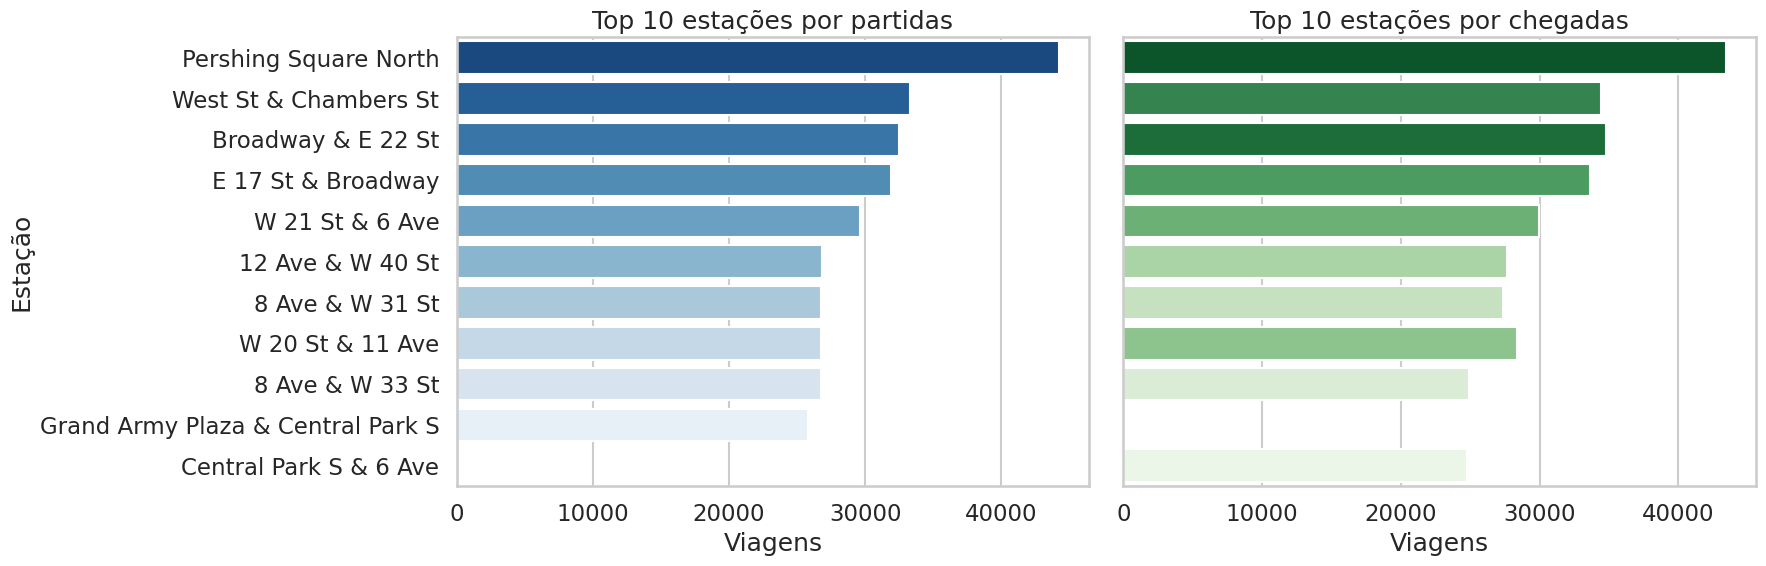

In [70]:
# 2. Top 10 estações de partida e chegada
top_start = (df.groupby(["start_station_id","start_station_name"])
               .size().reset_index(name="trips")
               .sort_values("trips", ascending=False).head(10))
top_end = (df.groupby(["end_station_id","end_station_name"])
             .size().reset_index(name="trips")
             .sort_values("trips", ascending=False).head(10))

print(top_start.head(), "\n")
print(top_end.head())

fig, axes = plt.subplots(1, 2, figsize=(18,6), sharey=True)
sns.barplot(data=top_start, x="trips", y="start_station_name", ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 estações por partidas")
axes[0].set_xlabel("Viagens")
axes[0].set_ylabel("Estação")

sns.barplot(data=top_end, x="trips", y="end_station_name", ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 10 estações por chegadas")
axes[1].set_xlabel("Viagens")
axes[1].set_ylabel("")
plt.tight_layout()
plt.show()

                count       mean        std       min       25%        50%  \
usertype                                                                     
Customer     586772.0  25.366343  20.298358  1.016667     14.25  21.616667   
Subscriber  3973093.0  12.742664   9.939367  1.016667  6.033333   9.866667   

                  75%         max  
usertype                           
Customer    28.916667  179.983333  
Subscriber      16.55  179.916667  


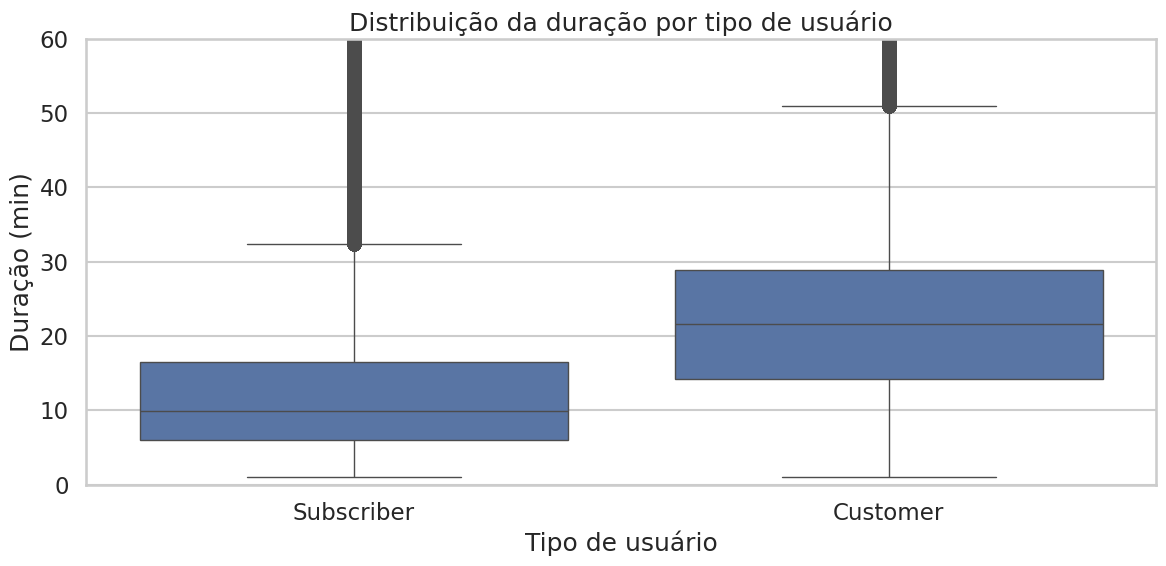

In [71]:
# 3. Duração por tipo de usuário
print(df.groupby("usertype")["trip_min"].describe())

ax = sns.boxplot(data=df, x="usertype", y="trip_min")
ax.set_ylim(0, 60)  # foca até 60 min
ax.set_title("Distribuição da duração por tipo de usuário")
ax.set_xlabel("Tipo de usuário")
ax.set_ylabel("Duração (min)")
plt.tight_layout()
plt.show()

   is_weekend  hour  trips
0       False     0  23098
1       False     1  10556
2       False     2   5523
3       False     3   3025
4       False     4   4429


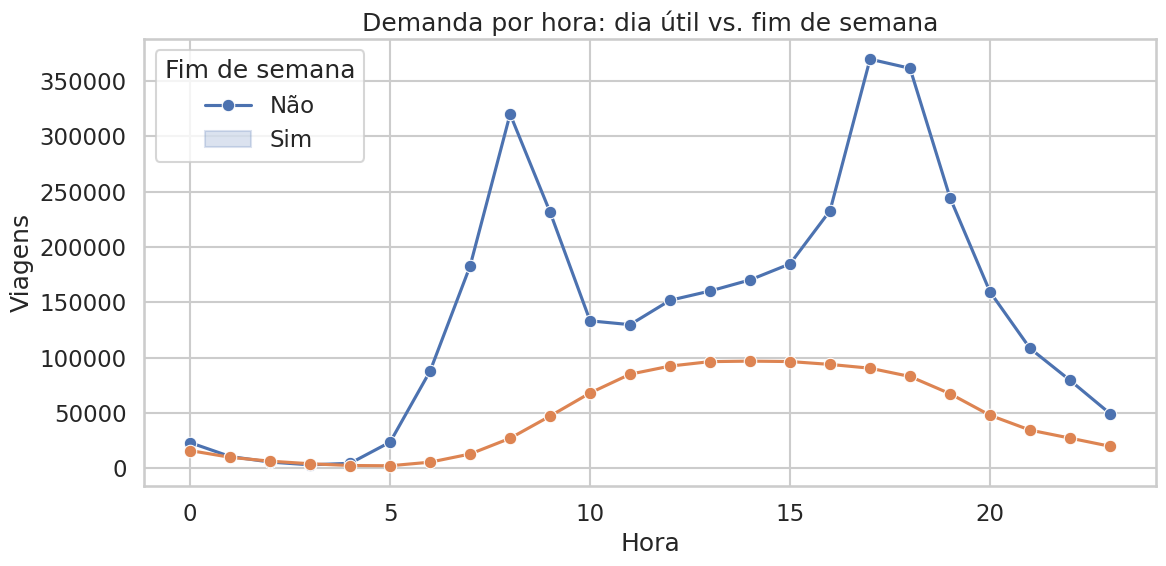

In [72]:
# 4. Dia útil vs. fim de semana por hora
df["is_weekend"] = df["dow"].isin(["Saturday", "Sunday"])
week_comp = df.groupby(["is_weekend", "hour"]).size().reset_index(name="trips")
print(week_comp.head())

sns.lineplot(data=week_comp, x="hour", y="trips", hue="is_weekend", marker="o")
plt.title("Demanda por hora: dia útil vs. fim de semana")
plt.xlabel("Hora")
plt.ylabel("Viagens")
plt.legend(title="Fim de semana", labels=["Não","Sim"])
plt.tight_layout()
plt.show()
